In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# df = pd.read_csv("../results/rssi_n10_10d_adr.csv")
# df = pd.read_csv("../results/rssi_n10_10d_noadr.csv")
df = pd.read_csv("../results/rssi_berlin_gw100m_moving.csv")
df

,"Vector of RSSI per node LoRaNetwork_moving.networkServer.app[0] ($0=""avg"", #0 - General-0-20230512-17:04:34-51471)",Unnamed: 1,"Vector of RSSI per node LoRaNetwork_moving.networkServer.app[0] ($0=""avg"", #0 - General-0-20230512-17:04:34-51471).1",Unnamed: 3,"Vector of RSSI per node LoRaNetwork_moving.networkServer.app[0] ($0=""avg"", #0 - General-0-20230512-17:04:34-51471).2",Unnamed: 5,"Vector of RSSI per node LoRaNetwork_moving.networkServer.app[0] ($0=""avg"", #0 - General-0-20230512-17:04:34-51471).3",Unnamed: 7,"Vector of RSSI per node LoRaNetwork_moving.networkServer.app[0] ($0=""avg"", #0 - General-0-20230512-17:04:34-51471).4",Unnamed: 9,"Vector of RSSI per node LoRaNetwork_moving.networkServer.app[0] ($0=""avg"", #0 - General-0-20230512-17:04:34-51471).5",Unnamed: 11,"Vector of RSSI per node LoRaNetwork_moving.networkServer.app[0] ($0=""avg"", #0 - General-0-20230512-17:04:34-51471).6",Unnamed: 13,"Vector of RSSI per node LoRaNetwork_moving.networkServer.app[0] ($0=""avg"", #0 - General-0-20230512-17:04:34-51471).7",Unnamed: 15,"Vector of RSSI per node LoRaNetwork_moving.networkServer.app[0] ($0=""avg"", #0 - General-0-20230512-17:04:34-51471).8",Unnamed: 17,"Vector of RSSI per node LoRaNetwork_moving.networkServer.app[0] ($0=""avg"", #0 - General-0-20230512-17:04:34-51471).9",Unnamed: 19
0,5.540012,-67.127400,7.901536,-80.470467,7.988269,-66.519022,9.015128,-70.768857,9.261755,-61.047064,9.799588,-69.772322,12.588831,-61.855367,18.625566,-61.913400,18.819165,-71.788412,19.544977,-60.416165
1,6.740012,-67.127400,9.101536,-80.470467,9.188269,-66.519022,10.215128,-70.768857,10.461755,-61.047064,10.999588,-69.772322,13.788831,-61.855367,19.825566,-61.913400,20.019165,-71.788412,20.744977,-60.416165
2,17.121603,-71.997580,16.628277,-69.014673,27.063146,-77.586087,25.380488,-74.372941,15.817412,-57.557389,20.613397,-61.352101,19.534155,-84.032246,57.444839,-61.400350,28.380140,-74.798915,32.910064,-68.000066
3,21.141123,-74.535548,20.647797,-72.680140,48.137622,-64.346784,31.821535,-66.881590,19.845086,-62.407837,24.632917,-63.790044,36.737472,-60.358276,89.844468,-63.827871,32.399660,-83.730334,36.929584,-67.808065
4,28.252808,-80.398706,28.567322,-70.929576,86.077860,-65.572613,37.270106,-69.244348,24.019166,-57.182048,36.242829,-63.218046,40.756992,-62.821947,102.191267,-66.990236,37.438790,-88.037406,41.270107,-62.923180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,6849.935103,-64.987426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
701,6857.935106,-56.593821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
702,6863.621626,-68.832795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
703,6868.642381,-68.993284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
1000/np.sqrt(2)

707.1067811865474

In [9]:
df_count = pd.read_csv("../results/count_berlin_gw100m_moving.csv")
df_count

,run,repetition,module,name,value
0,General-0-20230512-17:04:34-51471,0,LoRaNetwork_moving.networkServer.app[0],numReceivedFromNode 0,545
1,General-0-20230512-17:04:34-51471,0,LoRaNetwork_moving.networkServer.app[0],numReceivedFromNode 1,562
2,General-0-20230512-17:04:34-51471,0,LoRaNetwork_moving.networkServer.app[0],numReceivedFromNode 2,587
3,General-0-20230512-17:04:34-51471,0,LoRaNetwork_moving.networkServer.app[0],numReceivedFromNode 3,601
4,General-0-20230512-17:04:34-51471,0,LoRaNetwork_moving.networkServer.app[0],numReceivedFromNode 4,627
5,General-0-20230512-17:04:34-51471,0,LoRaNetwork_moving.networkServer.app[0],numReceivedFromNode 5,643
6,General-0-20230512-17:04:34-51471,0,LoRaNetwork_moving.networkServer.app[0],numReceivedFromNode 6,664
7,General-0-20230512-17:04:34-51471,0,LoRaNetwork_moving.networkServer.app[0],numReceivedFromNode 7,687
8,General-0-20230512-17:04:34-51471,0,LoRaNetwork_moving.networkServer.app[0],numReceivedFromNode 8,704
9,General-0-20230512-17:04:34-51471,0,LoRaNetwork_moving.networkServer.app[0],numReceivedFromNode 9,696


In [10]:
node_order = []
for i in ["Unnamed: 1", "Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 9", "Unnamed: 11", "Unnamed: 13", "Unnamed: 15", "Unnamed: 17", "Unnamed: 19"]:
    node_num = df_count.loc[df_count["value"] == df[i].count()-1].index[0]
    node_order.append("node"+str(node_num))
print(node_order)

['node8', 'node6', 'node0', 'node1', 'node4', 'node9', 'node2', 'node3', 'node7', 'node5']


In [11]:
rssi_values = df[["Unnamed: 1", "Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 9", "Unnamed: 11", "Unnamed: 13", "Unnamed: 15", "Unnamed: 17", "Unnamed: 19"]]
rssi_values.set_axis(node_order, axis='columns', inplace=True)
rssi_values = rssi_values.dropna()
print(rssi_values.head())

       node8      node6      node0      node1      node4      node9  \
0 -67.127400 -80.470467 -66.519022 -70.768857 -61.047064 -69.772322   
1 -67.127400 -80.470467 -66.519022 -70.768857 -61.047064 -69.772322   
2 -71.997580 -69.014673 -77.586087 -74.372941 -57.557389 -61.352101   
3 -74.535548 -72.680140 -64.346784 -66.881590 -62.407837 -63.790044   
4 -80.398706 -70.929576 -65.572613 -69.244348 -57.182048 -63.218046   

       node2      node3      node7      node5  
0 -61.855367 -61.913400 -71.788412 -60.416165  
1 -61.855367 -61.913400 -71.788412 -60.416165  
2 -84.032246 -61.400350 -74.798915 -68.000066  
3 -60.358276 -63.827871 -83.730334 -67.808065  
4 -62.821947 -66.990236 -88.037406 -62.923180  


In [12]:
simtime = df.iloc[:,[i*2 for i in range(10)]]
simtime.set_axis(node_order, axis='columns', inplace=True)
simtime = simtime.dropna()
print(simtime.head())

       node8      node6      node0      node1      node4      node9  \
0   5.540012   7.901536   7.988269   9.015128   9.261755   9.799588   
1   6.740012   9.101536   9.188269  10.215128  10.461755  10.999588   
2  17.121603  16.628277  27.063146  25.380488  15.817412  20.613397   
3  21.141123  20.647797  48.137622  31.821535  19.845086  24.632917   
4  28.252808  28.567322  86.077860  37.270106  24.019166  36.242829   

       node2       node3      node7      node5  
0  12.588831   18.625566  18.819165  19.544977  
1  13.788831   19.825566  20.019165  20.744977  
2  19.534155   57.444839  28.380140  32.910064  
3  36.737472   89.844468  32.399660  36.929584  
4  40.756992  102.191267  37.438790  41.270107  


In [13]:
rssi_values = rssi_values.reset_index()
simtime = simtime.reset_index()
melted_rssi = rssi_values.melt(id_vars=['index'], var_name='node_num', value_name='rssi_value')
melted_simtime = simtime.melt(id_vars=['index'], var_name='node_num', value_name='simtime')
merged = pd.merge(melted_rssi, melted_simtime,  how='left', left_on=['index','node_num'], right_on = ['index','node_num'])
merged.drop(columns=['index'], inplace=True)
merged.sort_values(by=['simtime'], inplace=True)
merged.reset_index(drop=True, inplace=True)
merged = merged[:5000]
merged['simtime'] = merged['simtime'].apply(lambda x: x/10)
merged

,node_num,rssi_value,simtime
0,node8,-67.127400,0.554001
1,node8,-67.127400,0.674001
2,node6,-80.470467,0.790154
3,node0,-66.519022,0.798827
4,node1,-70.768857,0.901513
...,...,...,...
4995,node3,-60.244636,503.152892
4996,node1,-72.586140,503.526573
4997,node8,-83.348976,503.552892
4998,node3,-61.652994,503.554845


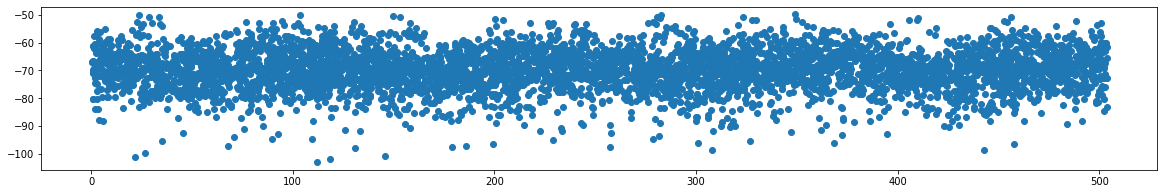

In [14]:
plt.figure(figsize=(20,3), facecolor="white")
plt.scatter(merged["simtime"], merged["rssi_value"])

In [15]:
import numpy as np
import pandas as pd
import pyproj

def create_dataframe(cx, cy, cz, r, speed, startAngle, total_time, time_step=1):
    """
    Creates a pandas DataFrame containing x, y, z coordinates and time.

    Parameters:
    cx, cy, cz: coordinates of the center of the circle
    r: radius of the circle
    speed: speed of the host
    startAngle: starting angle in degrees
    total_time: total time of simulation in seconds
    time_step: time step in seconds

    Returns:
    df: a pandas DataFrame
    """
    # Convert startAngle to radians
    startAngle = np.deg2rad(startAngle)

    # Create time array from 0 to total_time with step time_step
    t = np.arange(0, total_time, time_step)

    # Calculate the angular speed (omega)
    omega = speed / r

    # Calculate x, y, z coordinates
    x = cx + r * np.cos(omega * t + startAngle)
    y = cy + r * np.sin(omega * t + startAngle)
    z = np.full_like(t, cz)  # z-coordinate remains constant

    # Create pandas DataFrame
    df = pd.DataFrame({'time': t, 'x': x, 'y': y, 'z': z})

    return df

# Test the function with example parameters
gw_location = create_dataframe(452, 426, 100, 200, 1, 0, 100000)
gw_location["time"] = gw_location["time"].apply(lambda x: x/10)
print(gw_location)

def to_gps(x, y, zone, hemisphere):
    # define the coordinate systems
    transformer = pyproj.Transformer.from_crs(f"epsg:326{zone if hemisphere == 'north' else zone + 100}", "epsg:4326")
    
    lat, lon = transformer.transform(x, y)
    return [lat, lon]

zone = int((13.414041 + 180) / 6) + 1
min_x, min_y = 392384.90982960694, 5821806.173358405
gw_x = 652
gw_y = 426
gw_z = 100
gw_location_now = to_gps(gw_x+min_x, gw_y+min_y, zone, 'north')
gw_location_now.append(gw_z)
print(gw_location_now)

         time           x           y    z
0         0.0  652.000000  426.000000  100
1         0.1  651.997500  426.999996  100
2         0.2  651.990000  427.999967  100
3         0.3  651.977500  428.999888  100
4         0.4  651.960001  429.999733  100
...       ...         ...         ...  ...
99995  9999.5  272.946768  336.893659  100
99996  9999.6  273.394536  335.999511  100
99997  9999.7  273.846769  335.107612  100
99998  9999.8  274.303456  334.217986  100
99999  9999.9  274.764585  333.330654  100

[100000 rows x 4 columns]
[52.53965977699919, 13.422832676752234, 100]


In [119]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pyproj
from pykalman import KalmanFilter
from tqdm import tqdm

sample_time = 5
update_time = 1

results_3d = []
results_2d = []

estimated_locations_cartesian = []
estimated_locations_before_kalman = []
estimated_locations_for_moving_average = []
estimated_locations_cartesian_after_moving_average = []
estimation_std = []
estimated_locations = []
answer_locations = []

first_estimation = True

def to_gps_2d(x, y, zone, hemisphere):
    # define the coordinate systems
    transformer = pyproj.Transformer.from_crs(f"epsg:326{zone if hemisphere == 'north' else zone + 100}", "epsg:4326")
    
    lat, lon = transformer.transform(x, y)
    return [lat, lon]

# Convert GPS coordinates to Cartesian coordinates
def to_cartesian(lat, lon, alt):
    x, y, z = pyproj.Transformer.from_crs(4979, 4978, always_xy=True).transform(lon, lat, alt)
    return x, y, z

# # Convert GPS coordinates to Cartesian coordinates
def to_cartesian_2d(lat, lon):
    # Calculate UTM zone from longitude
    zone = int((lon + 180) / 6) + 1
    # Determine if the point is in the Northern or Southern hemisphere
    hemisphere = 'north' if lat >= 0 else 'south'

    # define the coordinate systems
    transformer = pyproj.Transformer.from_crs("epsg:4326", f"epsg:326{zone if lat >= 0 else zone + 100}")

    x, y = transformer.transform(lat, lon)
    return x, y

# Convert Cartesian coordinates to GPS coordinates
def to_gps(x, y, z):
    lon, lat, alt = pyproj.Transformer.from_crs(4978,4979, always_xy=True).transform(x, y, z)
    return lat, lon, alt

# Calculate the distance between the receiver and each source
def distance(xyz_receiver, xyz_source):
    return np.linalg.norm(xyz_source - xyz_receiver)

delta = 1  # Huber parameter, can be tuned

def huber_loss(errors):
    return np.where(np.abs(errors) < delta, 0.5 * errors**2, delta * (np.abs(errors) - 0.5 * delta))

def error(xyz_receiver, xyz_sources, d):
    distances = np.linalg.norm(xyz_sources - xyz_receiver, axis=1)
    errors = distances - d
    large_errors = np.abs(errors) >= delta
    errors_array.append(np.sqrt(errors**2))
    return np.sum(huber_loss(errors))

# Define a function to convert radians to degrees
def degrees(rad):
    return rad * 180 / np.pi

for i in tqdm(range(int(500/update_time))):
    sample_rssi = merged.loc[(merged['simtime'] >= i*update_time) & (merged['simtime'] <= i*update_time+sample_time)]
    average_rssi = sample_rssi.groupby('node_num')['rssi_value'].mean()
    average_distance = average_rssi.apply(lambda x: 10**((-18.67881 - x) / (10 * 2.04002)))
    average_distance.index = average_distance.index.str.replace('node', '')  # Remove 'node' from the index
    d = average_distance.tolist()

    node_numbers = list(map(int, average_distance.index)) 
    source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]
    source_locations = [source_locations[i] for i in node_numbers]

    zone = int((13.414041 + 180) / 6) + 1
    min_x, min_y = 392384.90982960694, 5821806.173358405
    gw_x = gw_location.loc[gw_location["time"]==i*update_time+sample_time]["x"].values[0]
    gw_y = gw_location.loc[gw_location["time"]==i*update_time+sample_time]["y"].values[0]
    gw_z = gw_location.loc[gw_location["time"]==i*update_time+sample_time]["z"].values[0]
    gw_location_now = to_gps_2d(gw_x+min_x, gw_y+min_y, zone, 'north')
    gw_location_now.append(gw_z)
    answer_location = gw_location_now

    errors_array = []

    # Starting GPS coordinates of the receiver (can be anywhere)
    receiver_location = (*source_locations[d.index(min(d))][:2],100)

    # Convert the GPS coordinates of the sources and the receiver to Cartesian coordinates
    xyz_sources = np.array([to_cartesian(*source_location) for source_location in source_locations])
    xyz_receiver = np.array(to_cartesian(*receiver_location))

    # Perform multilateration to estimate the location of the receiver
    result = minimize(error, xyz_receiver, args=(xyz_sources, d))
    xyz_receiver_estimated = result.x

    # # Store raw results in cartesian coords
    estimated_locations_cartesian.append(xyz_receiver_estimated)
    estimated_locations_before_kalman.append(to_gps(*xyz_receiver_estimated))

    # moving average in 3d cartesian
    estimated_locations_cartesian_df = pd.DataFrame(estimated_locations_cartesian)
    window_size = 5
    df_ma = estimated_locations_cartesian_df.rolling(min(window_size,len(estimated_locations_cartesian_df))).mean()
    xyz_receiver_estimated = np.array(df_ma.iloc[-1,:].tolist())

    # Convert the estimated Cartesian coordinates of the receiver back to GPS coordinates
    estimated_locations_cartesian_after_moving_average.append(xyz_receiver_estimated)
    receiver_location_estimated = to_gps(*xyz_receiver_estimated)

    # # moving average in 3d gps
    # estimated_locations_for_moving_average.append(receiver_location_estimated)
    # estimated_locations_for_moving_average_df = pd.DataFrame(estimated_locations_for_moving_average)
    # window_size = 10
    # df_ma = estimated_locations_for_moving_average_df.rolling(min(window_size,len(estimated_locations_for_moving_average_df))).mean()
    # receiver_location_estimated = np.array(df_ma.iloc[-1,:].tolist())

    results_3d.append(np.linalg.norm(to_cartesian(*answer_location)-xyz_receiver_estimated))
    results_2d.append(np.linalg.norm(np.array(to_cartesian_2d(*answer_location[:2])) - np.array(to_cartesian_2d(*receiver_location_estimated[:2]))))
    estimated_locations.append([i*update_time+sample_time,receiver_location_estimated])
    answer_locations.append(answer_location)

100%|██████████| 500/500 [00:52<00:00,  9.59it/s]


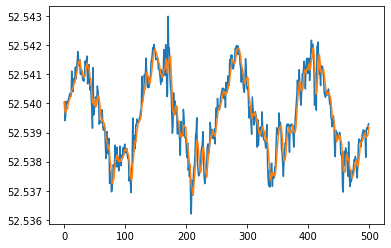

In [120]:
plt.plot([i for i in range(len(estimated_locations_before_kalman))],[i[0] for i in estimated_locations_before_kalman] )
plt.plot([i for i in range(len(estimated_locations))],[i[1][0] for i in estimated_locations] )
plt.show()

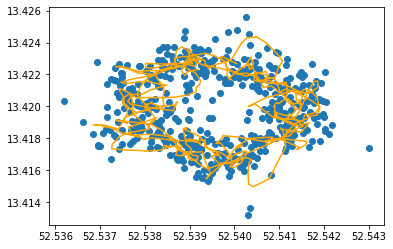

In [133]:
plt.scatter([i[0] for i in estimated_locations_before_kalman],[i[1] for i in estimated_locations_before_kalman] )
plt.plot([i[1][0] for i in estimated_locations],[i[1][1] for i in estimated_locations],c="orange" )
plt.show()

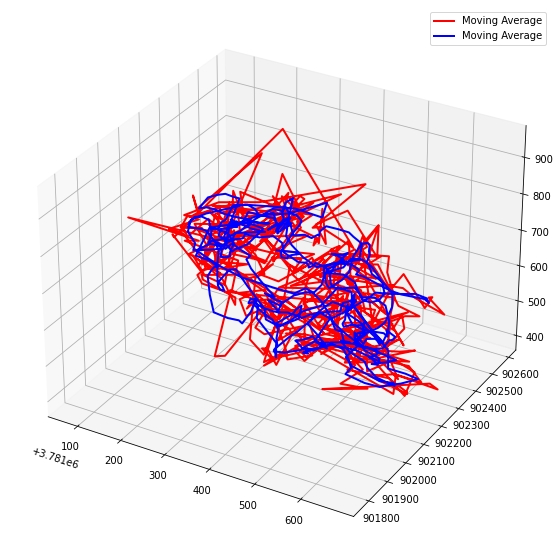

In [122]:
estimated_locations_cartesian_df = pd.DataFrame(estimated_locations_cartesian)
estimated_locations_cartesian_after_moving_average_df = pd.DataFrame(estimated_locations_cartesian_after_moving_average)

# Plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot original data
ax.plot(estimated_locations_cartesian_df[0], estimated_locations_cartesian_df[1], estimated_locations_cartesian_df[2], c='red', linewidth=2, label='Moving Average')
# ax.scatter(estimated_locations_cartesian_df[0], estimated_locations_cartesian_df[1], estimated_locations_cartesian_df[2], s=1, c='red', alpha=0.1, label='Original')

# Plot kalman data
# ax.scatter(estimated_locations_cartesian_after_moving_average_df[0], estimated_locations_cartesian_after_moving_average_df[1], estimated_locations_cartesian_after_moving_average_df[2], s=1, c='blue', alpha=0.1, label='Original')
ax.plot(estimated_locations_cartesian_after_moving_average_df[0], estimated_locations_cartesian_after_moving_average_df[1], estimated_locations_cartesian_after_moving_average_df[2], c='blue', linewidth=2, label='Moving Average')

ax.legend()
plt.show()

In [134]:
# visualize kalman filter
import folium

estimated_locations_folium = []
estimated_locations_befoer_kalman_folium = []
for i in range(len(estimated_locations)):
    estimated_locations_folium.append(estimated_locations[i][1][:2])
    estimated_locations_befoer_kalman_folium.append(estimated_locations_before_kalman[i][:2])

m = folium.Map(location=estimated_locations[0][1][:2], zoom_start=16, max_zoom=20)
folium.Circle(location=[52.53962045830213, 13.419884901364885], radius=200, color='green', fill=False).add_to(m)
folium.PolyLine(estimated_locations_befoer_kalman_folium[:125], color="purple").add_to(m)
folium.PolyLine(estimated_locations_folium[:125], color="blue").add_to(m)
m

In [125]:
estimation_std[0] = np.array([0,0,0])
estimation_std_mean = np.mean(estimation_std,axis=1)

IndexError: list assignment index out of range

In [127]:

import folium
import time

# Plot the sources and the estimated location of the receiver on a 2D map

# Plot the sources
for i in range(len(estimated_locations)):
    m = folium.Map(location=[52.53962045830213, 13.419884901364885], zoom_start=16, max_zoom=20)

    folium.Marker(location=estimated_locations[i][1][:2], icon=folium.Icon(color='purple')).add_to(m)
    folium.Marker(location=answer_locations[i][:2], icon=folium.Icon(color='green')).add_to(m)

    folium.Circle(location=[52.53962045830213, 13.419884901364885], radius=200, color='red', fill=False).add_to(m)
    folium.Circle(location=estimated_locations[i][1][:2], color='purple', fill=False).add_to(m)
    # folium.Circle(location=estimated_locations[i][1][:2], radius=estimation_std_mean[i]*3, color='purple', fill=False).add_to(m)
    display(m, clear=True)
    time.sleep(0.5)

KeyboardInterrupt: 

In [19]:
import os
import time
from selenium import webdriver
from tqdm import tqdm
# Setup selenium driver
options = webdriver.ChromeOptions()
options.add_argument("--headless")
driver = webdriver.Chrome(options=options)

# Folder to save images
os.makedirs("frames", exist_ok=True)

for i in tqdm(range(len(estimated_locations))):
    m = folium.Map(location=[52.53962045830213, 13.419884901364885], zoom_start=16, max_zoom=20)
    folium.Marker(location=estimated_locations[i][1][:2], icon=folium.Icon(color='purple')).add_to(m)
    folium.Marker(location=answer_locations[i][:2], icon=folium.Icon(color='green')).add_to(m)
    folium.Circle(location=[52.53962045830213, 13.419884901364885], radius=200, color='red', fill=False).add_to(m)
    
    # Save map to html
    m.save("map.html")
    
    # Open html file in browser and save screenshot
    driver.get("file:///Users/hiro/LoRaPos/simulation/flora_simulation/scripts/map.html")
    time.sleep(0.1)  # Give the map tiles some time to load
    driver.save_screenshot(f"frames/frame_{i}.png")

driver.quit()


100%|██████████| 500/500 [08:57<00:00,  1.08s/it]


In [20]:
import imageio

images = []
for i in tqdm(range(len(estimated_locations))):
    images.append(imageio.imread(f"frames/frame_{i}.png"))

imageio.mimsave('analysis_berlin_gw100m_moving_huberloss.gif', images, fps=3)

  0%|          | 0/500 [00:00<?, ?it/s]/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_30680/1931477089.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"frames/frame_{i}.png"))
100%|██████████| 500/500 [01:12<00:00,  6.88it/s]


KeyboardInterrupt: 

In [ ]:
import cv2
import glob

# Get frame file paths
frames = glob.glob('frames/*.png')

# Function to extract numbers from the filename
def extract_number(f):
    s = re.findall("\d+",f)
    return (int(s[0]) if s else -1,f)

frames.sort(key=extract_number)

# Read the first frame to get the height and width
img = cv2.imread(frames[0])
height, width, layers = img.shape

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Be sure to use lower case
out = cv2.VideoWriter('output.mp4', fourcc, 5.0, (width, height))

for frame in tqdm(frames):
    img = cv2.imread(frame)
    out.write(img)  # Write out frame to video

# Release everything if job is finished
out.release()
cv2.destroyAllWindows()

100%|██████████| 500/500 [00:36<00:00, 13.62it/s]


In [70]:

import folium

# Plot the sources and the estimated location of the receiver on a 2D map
m = folium.Map(location=[52.53962045830213, 13.419884901364885], zoom_start=17, max_zoom=20)

# Plot the sources
for i in range(len(estimated_locations)):
    folium.Marker(location=estimated_locations[i][1][:2], icon=folium.Icon(color='purple')).add_to(m)

for i in range(len(answer_locations)):
    folium.Marker(location=answer_locations[i][:2], icon=folium.Icon(color='green')).add_to(m)
    
folium.Circle(location=[52.53962045830213, 13.419884901364885], radius=200, color='red', fill=False).add_to(m)

m

mean eror in 2d 63.919494585668524 m
median eror in 2d 62.670550819912876 m
std in 2d 32.20891626348575


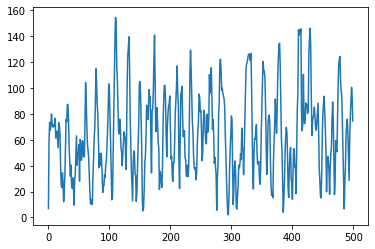

In [128]:
plt.plot(results_2d)
print("mean eror in 2d", np.mean(results_2d), "m")
print("median eror in 2d", np.median(results_2d), "m")
print("std in 2d", np.std(results_2d))

mean eror in 3d 79.14891436496016 m
median eror in 3d 76.12187441973194 m


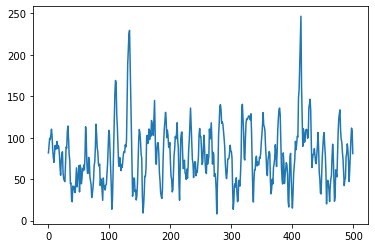

In [129]:
plt.plot(results_3d)
print("mean eror in 3d", np.mean(results_3d), "m")
print("median eror in 3d", np.median(results_3d), "m")

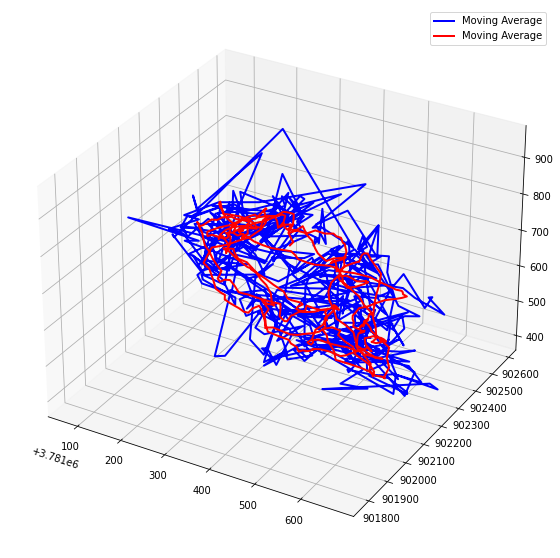

In [111]:
estimated_locations_cartesian_df = pd.DataFrame(estimated_locations_cartesian)

# Compute moving average
window_size = 10
df_ma = estimated_locations_cartesian_df.rolling(window_size).mean()

# Plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot original data
# ax.scatter(estimated_locations_cartesian_df[0], estimated_locations_cartesian_df[1], estimated_locations_cartesian_df[2], s=1, c='blue', alpha=0.1, label='Original')
ax.plot(estimated_locations_cartesian_df[0], estimated_locations_cartesian_df[1], estimated_locations_cartesian_df[2], c='blue', linewidth=2, label='Moving Average')

# Plot moving average data
ax.plot(df_ma[0], df_ma[1], df_ma[2], c='red', linewidth=2, label='Moving Average')

ax.legend()
plt.show()


In [36]:
df_ma

,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
495,3.781415e+06,902461.153085,5.039587e+06
496,3.781406e+06,902447.603164,5.039584e+06
497,3.781401e+06,902436.144765,5.039583e+06
498,3.781395e+06,902419.725787,5.039577e+06


In [47]:
tuple(df_ma.iloc[-1,:].tolist())

(3781255.386507089, 902403.6477059941, 5039591.188611564)

In [44]:
df_ma

,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
495,3.781415e+06,902461.153085,5.039587e+06
496,3.781406e+06,902447.603164,5.039584e+06
497,3.781401e+06,902436.144765,5.039583e+06
498,3.781395e+06,902419.725787,5.039577e+06
